# Setting the OpenAI Key as an Environment Variable

In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

# Importing Relevant Classes and functions

In [4]:
# Library Import
from langgraph.graph import START, END, StateGraph, add_messages
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.runnables import Runnable
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage
from collections.abc import Sequence
from typing import Annotated

# Define the State
class State(TypedDict):
    message: Annotated[Sequence[BaseMessage], add_messages]

# Define Chat Model
chat = ChatOpenAI(model='gpt-4',
                  seed= 25,
                  max_completion_tokens= 300,
                  temperature=0
)

# Define Node 1
def ask_question(state: State) -> State:
    print(f"\n---------> Entering ask_question")
    question = "What is your question ?" 
    print(question)
    return State(message = [AIMessage(question), HumanMessage(input())])

# Define Node 2
def chatbot(state: State) -> State:
    print(f"\n---------> Entering Chatbot")
        
    AI_message = chat.invoke(state['message'])
    AI_message.pretty_print()

    return State(message = [AI_message])

# Define Node 3
def ask_another_question(state: State) -> State:
    print(f"\n------------------> Entering ask_another_question")
    
    question = "Would you like to ask one more question (yes/no) ?"
    print(question)
    
    return State(message = [AIMessage(question), HumanMessage(input())])

# Routing Function
def routing_function(state: State) -> str:
    if(state['message'][-1].content == 'yes'):
        return 'True'
    else:
        return 'False'

# Define the graph
graph = StateGraph(State)

# Adding the nodes
graph.add_node('ask_question', ask_question)
graph.add_node('chatbot', chatbot)
graph.add_node('ask_another_question', ask_another_question)

# Adding edges
graph.add_edge(START, 'ask_question')
graph.add_edge('ask_question', 'chatbot')
graph.add_edge('chatbot', 'ask_another_question')
graph.add_conditional_edges(source='ask_another_question', path=routing_function, path_map={'True':'ask_question', 'False': '__end__'})

# compile the graph
graph_compiled = graph.compile()

# Test the graph
response = graph_compiled.invoke(State(message=[]))


---------> Entering ask_question
What is your question ?


 What is best time to visit Darjeeling ?



---------> Entering Chatbot
================================== Ai Message ==================================

The best time to visit Darjeeling is from April to June when the weather is pleasant and the temperature ranges from 20-25 degrees Celsius. This is the perfect time for sightseeing and outdoor activities. However, if you want to experience the winter chill, you can visit Darjeeling in the months of October to March.

------------------> Entering ask_another_question
Would you like to ask one more question (yes/no) ?


 yes



---------> Entering ask_question
What is your question ?


 How to visit there from Delhi ?



---------> Entering Chatbot
================================== Ai Message ==================================

There are several ways to reach Darjeeling from Delhi:

1. By Air: The nearest airport to Darjeeling is Bagdogra Airport, which is approximately 96 km away. There are direct flights from Delhi to Bagdogra. From the airport, you can hire a taxi or take a shared cab to reach Darjeeling.

2. By Train: The nearest railway station is New Jalpaiguri (NJP), which is well-connected to major cities in India. From Delhi, you can take a train to NJP. From NJP, you can hire a taxi or take a shared cab to reach Darjeeling.

3. By Road: You can also drive from Delhi to Darjeeling. The distance is approximately 1,464 km and it takes about 27-30 hours to reach by road. However, it's a long journey and might be tiring, so it's recommended to break the journey into parts.

Remember to check travel advisories and restrictions due to the current pandemic situation before planning your trip.

----

 no


# The MessageState Class

In [7]:
# Library Import
from langgraph.graph import START, END, StateGraph, add_messages, MessagesState
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage
from collections.abc import Sequence
from typing import Annotated, Literal

# Define Chat Model
chat = ChatOpenAI(model='gpt-4',
                  seed= 25,
                  max_completion_tokens= 300,
                  temperature=0
)

# Define Node 1
def ask_question(state: MessagesState) -> MessagesState:
    print(f"\n---------> Entering ask_question")
    question = "What is your question ?" 
    print(question)
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

# Define Node 2
def chatbot(state: MessagesState) -> MessagesState:
    print(f"\n---------> Entering Chatbot")
        
    AI_message = chat.invoke(state['messages'])
    AI_message.pretty_print()

    return MessagesState(messages = [AI_message])

# Define Node 3
def ask_another_question(state: MessagesState) -> MessagesState:
    print(f"\n------------------> Entering ask_another_question")
    
    question = "Would you like to ask one more question (yes/no) ?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

# Routing Function
def routing_function(state: MessagesState) -> Literal['True', 'False']:
    if(state['messages'][-1].content == 'yes'):
        return 'True'
    else:
        return 'False'

# Define the graph
graph = StateGraph(MessagesState)

# Adding the nodes
graph.add_node('ask_question', ask_question)
graph.add_node('chatbot', chatbot)
graph.add_node('ask_another_question', ask_another_question)

# Adding edges
graph.add_edge(START, 'ask_question')
graph.add_edge('ask_question', 'chatbot')
graph.add_edge('chatbot', 'ask_another_question')
graph.add_conditional_edges(source='ask_another_question', path=routing_function, path_map={'True':'ask_question', 'False': '__end__'})

# compile the graph
graph_compiled = graph.compile()

# Test the graph
response = graph_compiled.invoke(MessagesState(message=[]))


---------> Entering ask_question
What is your question ?


 what is the best time to visit Darjeeling ?



---------> Entering Chatbot
================================== Ai Message ==================================

The best time to visit Darjeeling is from April to June when the weather is pleasant and the skies are clear. This is the perfect time for sightseeing and outdoor activities. Another good time to visit is from October to March when the weather is cool and comfortable. However, it can get quite cold in December and January.

------------------> Entering ask_another_question
Would you like to ask one more question (yes/no) ?


 yes



---------> Entering ask_question
What is your question ?


 How to reach there from Delhi ?



---------> Entering Chatbot
================================== Ai Message ==================================

There are several ways to reach Darjeeling from Delhi:

1. By Air: The nearest airport to Darjeeling is Bagdogra Airport, which is well connected to Delhi. From the airport, you can hire a taxi or take a shared cab to reach Darjeeling, which is about 3-4 hours away.

2. By Train: You can take a train from Delhi to New Jalpaiguri or Siliguri. From there, you can hire a taxi or take a shared cab to reach Darjeeling. The Darjeeling Himalayan Railway, also known as the Toy Train, is another option from New Jalpaiguri.

3. By Road: You can also drive from Delhi to Darjeeling, but it's a long journey of about 24-26 hours. The roads are well-maintained and the journey is quite scenic, especially the stretch through the Mahananda Wildlife Sanctuary.

Remember to check travel advisories and restrictions due to the current pandemic situation before planning your trip.

-----------------

 no


# The RemoveMessage Class

In [11]:
# Library Import
from langgraph.graph import START, END, StateGraph, add_messages, MessagesState
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage, RemoveMessage
from collections.abc import Sequence
from typing import Annotated, Literal

# Define Chat Model
chat = ChatOpenAI(model='gpt-4',
                  seed= 25,
                  max_completion_tokens= 300,
                  temperature=0
)

# Define Node 1
def ask_question(state: MessagesState) -> MessagesState:
    print(f"\n---------> Entering ask_question")
    question = "What is your question ?" 
    print(question)
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

# Define Node 2
def chatbot(state: MessagesState) -> MessagesState:
    print(f"\n---------> Entering Chatbot")
        
    AI_message = chat.invoke(state['messages'])
    AI_message.pretty_print()

    return MessagesState(messages = [AI_message])

# Define Node 3
def ask_another_question(state: MessagesState) -> MessagesState:
    print(f"\n------------------> Entering ask_another_question")
    
    question = "Would you like to ask one more question (yes/no) ?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

# Define Node 4
def trim_messages(state: MessagesState) -> MessagesState:
    print(f"\n---------> Entering trim_messages")
    remove_messages = [RemoveMessage(id = i.id) for i in state['messages'][:-5]]

    return MessagesState(messages = remove_messages)

# Routing Function
def routing_function(state: MessagesState) -> Literal['True', 'False']:
    if(state['messages'][-1].content == 'yes'):
        return 'True'
    else:
        return 'False'

# Define the graph
graph = StateGraph(MessagesState)

# Adding the nodes
graph.add_node('ask_question', ask_question)
graph.add_node('chatbot', chatbot)
graph.add_node('ask_another_question', ask_another_question)
graph.add_node('trim_messages', trim_messages)

# Adding edges
graph.add_edge(START, 'ask_question')
graph.add_edge('ask_question', 'chatbot')
graph.add_edge('chatbot', 'ask_another_question')
graph.add_conditional_edges(source='ask_another_question', path=routing_function, path_map={'True':'trim_messages', 'False': '__end__'})
graph.add_edge('trim_messages', 'ask_question')

# compile the graph
graph_compiled = graph.compile()

# Test the graph
response = graph_compiled.invoke(MessagesState(message=[]))


---------> Entering ask_question
What is your question ?


 What is the best time to visit Darjeeling ?



---------> Entering Chatbot
================================== Ai Message ==================================

The best time to visit Darjeeling is from April to June when the weather is pleasant and the temperature ranges between 15°C and 25°C. Another good time to visit is between October to December when the skies are clear, offering great views of the surrounding mountains. However, if you want to experience the winter chill, you can visit between January and February.

------------------> Entering ask_another_question
Would you like to ask one more question (yes/no) ?


 yes



---------> Entering trim_messages

---------> Entering ask_question
What is your question ?


 what are the best spots to visit ?



---------> Entering Chatbot
================================== Ai Message ==================================

In Darjeeling, there are several popular tourist spots. Here are a few:

1. Tiger Hill: Famous for its panoramic views of Mount Everest and Mt. Kangchenjunga together.

2. Batasia Loop: A beautiful garden with a war memorial and a loop of the toy train.

3. Darjeeling Himalayan Railway: Also known as the Toy Train, it is a UNESCO World Heritage Site.

4. The Mall Road & Chowrasta: The town center filled with shops and restaurants.

5. Himalayan Mountaineering Institute: Offers mountaineering and adventure courses, and also houses a museum.

6. Padmaja Naidu Himalayan Zoological Park: Known for its conservation efforts for Red Pandas, Snow Leopards, and Tibetan Wolves.

7. Tea Gardens: Darjeeling is famous for its tea. Happy Valley Tea Estate is one of the popular tea gardens.

8. Peace Pagoda: A symbol of peace and spiritually, it offers a serene environment and beautiful view

 yes



---------> Entering trim_messages

---------> Entering ask_question
What is your question ?


 what is the cost of complete tour to there in indian rupees ?



---------> Entering Chatbot
================================== Ai Message ==================================

The cost of a complete tour to Darjeeling can vary greatly depending on various factors such as the time of year, the type of accommodation you choose, the length of your stay, and the activities you want to do. 

On average, you might expect to spend anywhere from 10,000 to 30,000 Indian Rupees per person for a 3-4 day trip, including accommodation, meals, local transportation, and entry fees for various attractions. This is just a rough estimate and the actual cost could be lower or higher.

For a more accurate estimate, I would recommend contacting a travel agency or doing a detailed cost breakdown based on your specific plans and preferences.

------------------> Entering ask_another_question
Would you like to ask one more question (yes/no) ?


 yes



---------> Entering trim_messages

---------> Entering ask_question
What is your question ?


 How to visit there from Delhi ?



---------> Entering Chatbot
================================== Ai Message ==================================

There are several ways to reach Darjeeling from Delhi:

1. By Air: The nearest airport to Darjeeling is Bagdogra Airport, which is well connected to Delhi. From Bagdogra, you can hire a taxi or take a shared cab to reach Darjeeling, which is approximately 3-4 hours away.

2. By Train: You can take a train from Delhi to New Jalpaiguri (NJP) or Siliguri. From there, you can hire a taxi or take a shared cab to reach Darjeeling. The Darjeeling Himalayan Railway, also known as the Toy Train, is a popular way to reach Darjeeling from Siliguri.

3. By Road: If you prefer to drive, you can take the National Highway 27 which is approximately 1,465 km and the journey may take around 30 hours.

Please note that the travel time can vary depending on the mode of transport and traffic conditions.

------------------> Entering ask_another_question
Would you like to ask one more question (yes

 yes



---------> Entering trim_messages

---------> Entering ask_question
What is your question ?


 What is the distance from delhi ?



---------> Entering Chatbot
================================== Ai Message ==================================

The distance from Delhi to Darjeeling is approximately 1,465 kilometers by road. If you're flying, the aerial distance is around 1,200 kilometers. Please note that these distances are approximate and can vary based on the exact start and end points of your journey.

------------------> Entering ask_another_question
Would you like to ask one more question (yes/no) ?


 no


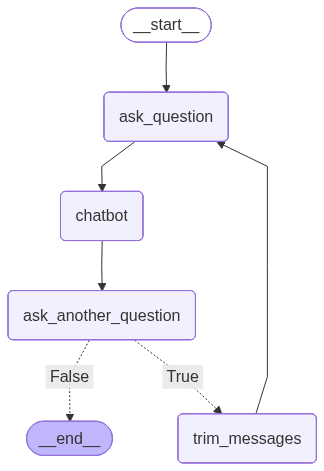

In [14]:
graph_compiled

# Summarize

In [9]:
from langgraph.graph import START, END, StateGraph, add_messages
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import (
    HumanMessage,
    AIMessage,
    RemoveMessage,
    SystemMessage,
    BaseMessage,
)
from typing_extensions import TypedDict
from typing import Annotated, Literal

# -------------------------
# Define the State (CORRECT)
# -------------------------
class State(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]
    summary: str


# -------------------------
# Chat Model
# -------------------------
chat = ChatOpenAI(
    model="gpt-4",
    seed=25,
    max_completion_tokens=300,
    temperature=0,
)

# -------------------------
# Node 1: Ask Question
# -------------------------
def ask_question(state: State):
    print("\n---------> Entering ask_question")
    question = "What is your question?"
    print(question)
    return {
        "messages": [
            AIMessage(content=question),
            HumanMessage(content=input()),
        ]
    }

# -------------------------
# Node 2: Chatbot
# -------------------------
def chatbot(state: State):
    print("\n---------> Entering chatbot")

    system_message = f"""
    Here's a quick summary of what's been discussed so far:
    {state.get("summary", "")}

    Keep this in mind as you answer the next question.
    """

    response = chat.invoke(
        [SystemMessage(content=system_message)] + state["messages"]
    )
    response.pretty_print()

    return {"messages": [response]}

# -------------------------
# Node 3: Ask Another Question
# -------------------------
def ask_another_question(state: State):
    print("\n---------> Entering ask_another_question")
    question = "Would you like to ask one more question (yes/no)?"
    print(question)
    return {
        "messages": [
            AIMessage(content=question),
            HumanMessage(content=input().lower()),
        ]
    }

# -------------------------
# Node 4: Summarize & Trim
# -------------------------
def summarize_and_delete_messages(state: State):
    print("\n---------> Entering summarize_and_delete_messages")

    conversation = "\n".join(
        f"{m.type}: {m.content}" for m in state["messages"]
    )

    summary_instruction = f"""
    Update the ongoing summary by incorporating the new conversation below.
    Build upon the previous summary instead of repeating it.

    Previous Summary:
    {state.get("summary", "")}

    New Conversation:
    {conversation}
    """

    summary = chat.invoke([HumanMessage(content=summary_instruction)])

    return {
        "summary": summary.content,
        "messages": [RemoveMessage(id=m.id) for m in state["messages"]],
    }

# -------------------------
# Routing Function
# -------------------------
def routing_function(state: State) -> Literal["True", "False"]:
    return "True" if state["messages"][-1].content == "yes" else "False"

# -------------------------
# Build the Graph
# -------------------------
graph = StateGraph(State)

graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)
graph.add_node("summarize_and_delete_messages", summarize_and_delete_messages)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")

graph.add_conditional_edges(
    "ask_another_question",
    routing_function,
    {
        "True": "summarize_and_delete_messages",
        "False": END,
    },
)

graph.add_edge("summarize_and_delete_messages", "ask_question")

graph_compiled = graph.compile()

# -------------------------
# Run
# -------------------------
response = graph_compiled.invoke(
    {
        "messages": [],
        "summary": "",
    }
)



---------> Entering ask_question
What is your question?


 What is the best time to visit Darjeeling ?



---------> Entering chatbot
================================== Ai Message ==================================

The best time to visit Darjeeling is from April to June when the weather is pleasant and the skies are clear. This is the perfect time for sightseeing and outdoor activities. Another good time to visit is from October to December when the weather is slightly chilly but clear views of the surrounding mountains can be enjoyed.

---------> Entering ask_another_question
Would you like to ask one more question (yes/no)?


 yes



---------> Entering summarize_and_delete_messages

---------> Entering ask_question
What is your question?


 what are the best spots to visit if visited in Feb 2026?



---------> Entering chatbot
================================== Ai Message ==================================

Visiting Darjeeling in February can be a unique experience as the weather is quite chilly, but it's less crowded. Here are some of the best spots to visit:

1. Tiger Hill: It's a famous viewpoint where you can witness a beautiful sunrise over the Kanchenjunga and Mount Everest. The view might be clearer in February due to less rainfall.

2. Darjeeling Himalayan Railway: Also known as the "Toy Train", it's a UNESCO World Heritage site. The train ride offers scenic views of the mountains and landscapes.

3. Batasia Loop: It's a spiral railway created to lower the gradient of ascent of the Darjeeling Himalayan Railway. There's also a war memorial at the center of the loop.

4. Padmaja Naidu Himalayan Zoological Park: It's a high-altitude wildlife park with rare animals like Red Pandas and Snow Leopards. 

5. Tea Gardens: Darjeeling is famous for its tea. Visiting the tea gardens,

 no


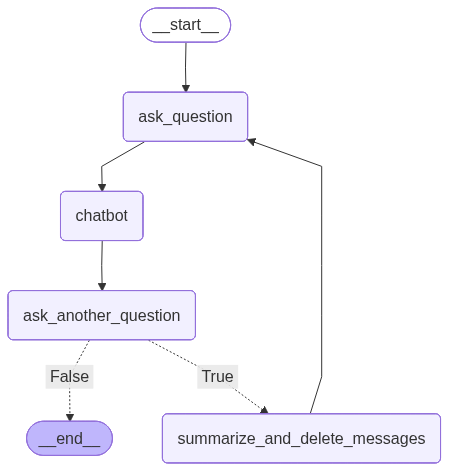

In [16]:
graph_compiled